In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df=pd.read_excel(r"C:\Users\amits\Downloads\Data_Train.xlsx" )

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# EDA

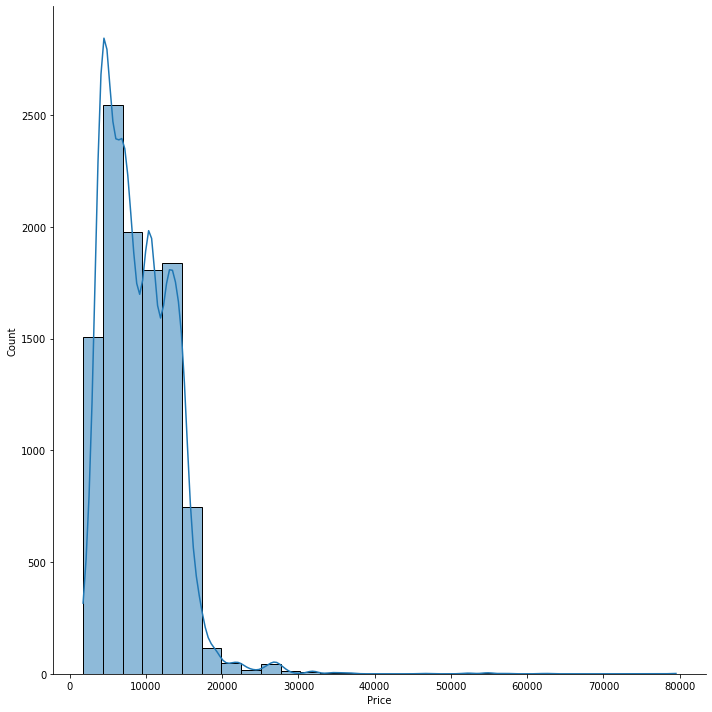

In [6]:
sns.displot(x=df['Price'],kind="hist", height=10, bins=30, kde=True)

In [7]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<Axes: ylabel='Airline'>

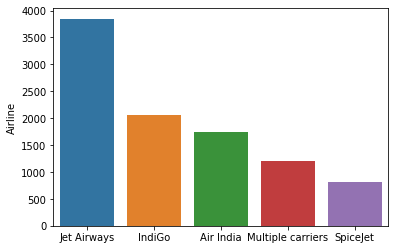

In [8]:
sns.barplot(x=df["Airline"].value_counts()[:5].index, y=df["Airline"].value_counts()[:5])

In [9]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<Axes: ylabel='Total_Stops'>

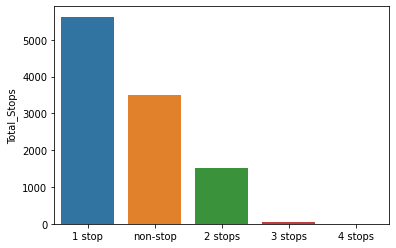

In [10]:
sns.barplot(x=df["Total_Stops"].value_counts().index, y=df["Total_Stops"].value_counts())

<Axes: xlabel='Destination', ylabel='Price'>

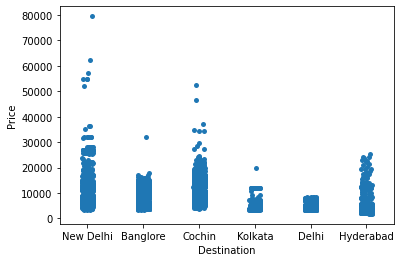

In [11]:
sns.stripplot(x="Destination", y="Price", data=df, jitter=0.1)

<Axes: xlabel='Source', ylabel='Price'>

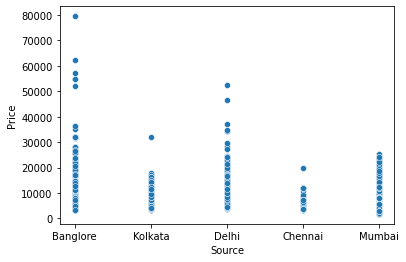

In [12]:
sns.scatterplot(x="Source", y="Price", data=df)

In [13]:
#Feature Engineering process

In [14]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [15]:
# or you can use
# df['Date']=df['Date_of_Journey'].apply(lambda x:x.split('/')[0])
# df['Month']=df['Date_of_Journey'].apply(lambda x:x.split('/')[1])
# df['Year']=df['Date_of_Journey'].apply(lambda x:x.split('/')[2])

In [16]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [18]:
df.drop(['Date_of_Journey'],axis=1, inplace=True)

In [19]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [20]:
df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [21]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [22]:
df['Arrival_hour']=df['Arrival_Time'].apply(lambda x:x.split(':')[0])
df['Arrival_min']=df['Arrival_Time'].apply(lambda x:x.split(':')[1])

In [23]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
 13  Arrival_hour     10683 non-null  int32 
 14  Arrival_min      10683 non-null  int32 
dtypes: int32(5), int64(1), object(9)
memory usage: 1.0+ MB


In [25]:
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [26]:
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,2h 30m,non-stop,No info,4107,9,4,2019,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,2h 35m,non-stop,No info,4145,27,4,2019,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,3h,non-stop,No info,7229,27,4,2019,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,2h 40m,non-stop,No info,12648,1,3,2019,14,10


In [27]:
df['Dep_hour']=df['Dep_Time'].apply(lambda x:x.split(':')[0])
df['Dep_min']=df['Dep_Time'].apply(lambda x:x.split(':')[1])

In [28]:
df['Dep_hour']=df['Dep_hour'].astype(int)
df['Dep_min']=df['Dep_min'].astype(int)

In [29]:
df.drop(['Dep_Time'], axis=1, inplace=True)

In [30]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  Arrival_hour     10683 non-null  int32 
 12  Arrival_min      10683 non-null  int32 
 13  Dep_hour         10683 non-null  int32 
 14  Dep_min          10683 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 959.9+ KB


In [32]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [33]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [34]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '1 stop':1,'2 stops':2, '3 stops': 3, '4 stops':4, 'nan':1})

In [35]:
df.drop(['Route'],axis=1, inplace=True)

In [36]:
df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,2019,4,25,9,25


In [37]:
df['Total_Stops']= df['Total_Stops'].fillna(df['Total_Stops'].eq(1))

In [38]:
df['Total_Stops']=df['Total_Stops'].astype(int)

In [39]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [40]:
df['Total_Stops'].isnull().sum()

0

In [41]:
df['Duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [42]:
df[df['Duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2,No info,17327,6,3,2019,16,55,16,50,5m


In [43]:
df.drop(6474, axis=0, inplace=True)

In [44]:
df.drop(2660, axis=0, inplace=True)

In [45]:
df[df['Duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour


In [46]:
df['Duration_hour']=df['Duration_hour'].astype(int)

In [47]:
df['Duration_min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [48]:
df['Duration_min'].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [49]:
df['Duration_min']=df['Duration_min'].fillna(0)

In [50]:
df['Duration_min']=df['Duration_min'].astype(int)

In [51]:
df['Duration_min'].unique()

array([50, 25,  0, 45, 30,  5, 15, 35, 10, 20, 55, 40])

In [52]:
df.drop(['Duration'], axis=1, inplace=True)

In [53]:
df.drop(['Additional_Info'], axis=1, inplace=True)

In [54]:
corr=df.corr()
corr

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
Total_Stops,1.000000,0.603736,-0.009178,0.054433,NaN,0.038189,-0.107385,-0.061422,-0.003058,0.739885,-0.136344
Price,0.603736,1.000000,-0.153610,-0.103536,NaN,0.024221,-0.086548,0.006770,-0.024776,0.508929,-0.124552
Date,-0.009178,-0.153610,1.000000,-0.038489,NaN,-0.003164,-0.017352,0.002261,-0.008139,-0.022254,-0.009141
Month,0.054433,-0.103536,-0.038489,1.000000,NaN,-0.003869,-0.100472,0.039267,-0.059125,0.015811,-0.040911
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_hour,0.038189,0.024221,-0.003164,-0.003869,NaN,1.000000,-0.154445,0.005182,0.043020,0.055275,-0.118353
Arrival_min,-0.107385,-0.086548,-0.017352,-0.100472,NaN,-0.154445,1.000000,0.067854,-0.017866,-0.074379,0.152020
Dep_hour,-0.061422,0.006770,0.002261,0.039267,NaN,0.005182,0.067854,1.000000,-0.024855,0.002965,-0.023768
Dep_min,-0.003058,-0.024776,-0.008139,-0.059125,NaN,0.043020,-0.017866,-0.024855,1.000000,-0.021904,0.092842
Duration_hour,0.739885,0.508929,-0.022254,0.015811,NaN,0.055275,-0.074379,0.002965,-0.021904,1.000000,-0.126261


C:\Users\amits\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

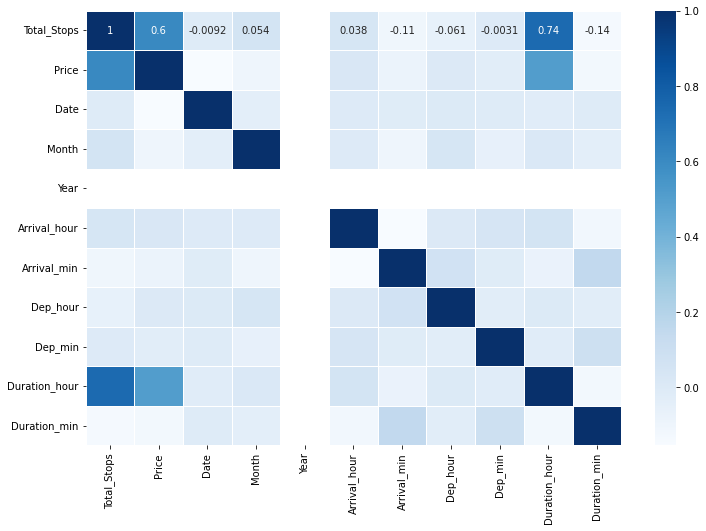

In [55]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, linewidth=.5, cmap="Blues")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10681 non-null  object
 1   Source         10681 non-null  object
 2   Destination    10681 non-null  object
 3   Total_Stops    10681 non-null  int32 
 4   Price          10681 non-null  int64 
 5   Date           10681 non-null  int32 
 6   Month          10681 non-null  int32 
 7   Year           10681 non-null  int32 
 8   Arrival_hour   10681 non-null  int32 
 9   Arrival_min    10681 non-null  int32 
 10  Dep_hour       10681 non-null  int32 
 11  Dep_min        10681 non-null  int32 
 12  Duration_hour  10681 non-null  int32 
 13  Duration_min   10681 non-null  int32 
dtypes: int32(10), int64(1), object(3)
memory usage: 834.5+ KB


In [57]:
fdf = pd.get_dummies(columns=["Source", "Destination", "Airline"], data=df)

In [58]:
fdf.head()

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,2019,1,10,22,20,2,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,2019,13,15,5,50,7,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,2019,4,25,9,25,19,...,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,2019,23,30,18,5,5,...,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,2019,21,35,16,50,4,...,0,1,0,0,0,0,0,0,0,0


In [59]:
# we dropped airlines source and destination

In [60]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10681 non-null  int32
 1   Price                                      10681 non-null  int64
 2   Date                                       10681 non-null  int32
 3   Month                                      10681 non-null  int32
 4   Year                                       10681 non-null  int32
 5   Arrival_hour                               10681 non-null  int32
 6   Arrival_min                                10681 non-null  int32
 7   Dep_hour                                   10681 non-null  int32
 8   Dep_min                                    10681 non-null  int32
 9   Duration_hour                              10681 non-null  int32
 10  Duration_min                               106

In [61]:
fdf.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_hour', 'Duration_min',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [62]:
y=fdf[['Price']]

In [63]:
x=fdf.loc[:,fdf.columns!='Price']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [66]:
x_train.shape

(7476, 33)

In [67]:
y_train.shape

(7476, 1)

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [69]:
rfr = RandomForestRegressor()


param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
    'max_depth': [None, 10, 20, 30, 40,50],
    'min_samples_split': [2, 5, 10, 14, 16, 18, 20],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV( rfr, param_grid, verbose=1, n_jobs = -1, scoring="neg_mean_squared_error", cv=5 )

grid_search.fit(x_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


C:\Users\amits\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [70]:
grid_search.best_estimator_   

RandomForestRegressor(max_depth=20, min_samples_split=10)

In [72]:
rfr = RandomForestRegressor(max_depth=20, min_samples_split=10)

In [75]:
from sklearn import metrics

In [76]:
rfr.fit(x_train , y_train)
y_pred = rfr.predict(x_test)
metrics.r2_score(y_test, y_pred)

C:\Users\amits\AppData\Local\Temp/ipykernel_4940/1665525533.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train , y_train)


0.8149962563272323

C:\Users\amits\AppData\Local\Temp/ipykernel_4940/1420161757.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\amits\AppData\Local\Temp/ipykernel_4940/1420161757.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y

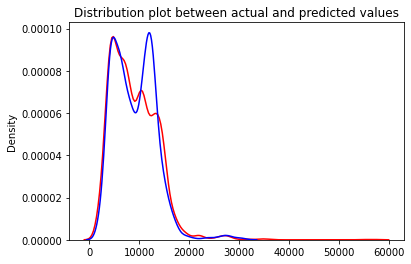

In [77]:
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, color="b", hist=False, label="Predicted Value")
plt.title("Distribution plot between actual and predicted values")
plt.show()

In [78]:
import pickle 
pickle.dump(rfr, open("flightdest.pkl", "wb"))